In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# ============================================
# 1. LOAD AND CLEAN DATA
# ============================================

# Upload your CSV file in Colab
from google.colab import files
print("Please upload your googl_data_2020_2025.csv file...")
uploaded = files.upload()

Please upload your googl_data_2020_2025.csv file...


Saving googl_data_2020_2025.csv to googl_data_2020_2025.csv


In [ ]:
# Load data
df = pd.read_csv('googl_data_2020_2025.csv')

print("=" * 80)
print("ORIGINAL DATA SHAPE:", df.shape)
print("=" * 80)
print(df.head(10))

ORIGINAL DATA SHAPE: (1260, 7)
                       Price    Adj Close        Close         High  \
0                     Ticker        GOOGL        GOOGL        GOOGL   
1                       Date          NaN          NaN          NaN   
2  2020-01-02 00:00:00+00:00  68.18682098  68.43399811  68.43399811   
3  2020-01-03 00:00:00+00:00  67.83010101   68.0759964      68.6875   
4  2020-01-06 00:00:00+00:00  69.63805389  69.89050293  69.91600037   
5  2020-01-07 00:00:00+00:00  69.50354767  69.75550079  70.17500305   
6  2020-01-08 00:00:00+00:00  69.99825287   70.2519989  70.59249878   
7  2020-01-09 00:00:00+00:00  70.73309326  70.98950195  71.43399811   
8  2020-01-10 00:00:00+00:00  71.18992615  71.44799805  71.74700165   
9  2020-01-13 00:00:00+00:00  71.74143219  72.00150299   72.0739975   

           Low         Open    Volume  
0        GOOGL        GOOGL     GOOGL  
1          NaN          NaN       NaN  
2  67.32450104  67.42050171  27278000  
3  67.36599731  67.40000153

In [ ]:
# ============================================
# 2. DATA CLEANING
# ============================================

# Remove first two rows (headers)
df = df.iloc[2:].reset_index(drop=True)

# Convert Price column to datetime
df['Date'] = pd.to_datetime(df['Price'])
df = df.drop('Price', axis=1)

# Convert all other columns to float
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove any rows with missing values
df = df.dropna()

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

print("\n" + "=" * 80)
print("CLEANED DATA SHAPE:", df.shape)
print("=" * 80)
print(df.head())
print("\n" + "=" * 80)
print("DATA INFO:")
print("=" * 80)
print(df.info())
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY:")
print("=" * 80)
print(df.describe())


CLEANED DATA SHAPE: (1258, 7)
   Adj Close      Close       High        Low       Open    Volume  \
0  68.186821  68.433998  68.433998  67.324501  67.420502  27278000   
1  67.830101  68.075996  68.687500  67.365997  67.400002  23408000   
2  69.638054  69.890503  69.916000  67.550003  67.581497  46768000   
3  69.503548  69.755501  70.175003  69.578003  70.023003  34330000   
4  69.998253  70.251999  70.592499  69.631500  69.740997  35314000   

                       Date  
0 2020-01-02 00:00:00+00:00  
1 2020-01-03 00:00:00+00:00  
2 2020-01-06 00:00:00+00:00  
3 2020-01-07 00:00:00+00:00  
4 2020-01-08 00:00:00+00:00  

DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Adj Close  1258 non-null   float64            
 1   Close      1258 non-null   float64            
 2   High       1258 non-null   float64   


STARTING EDA...


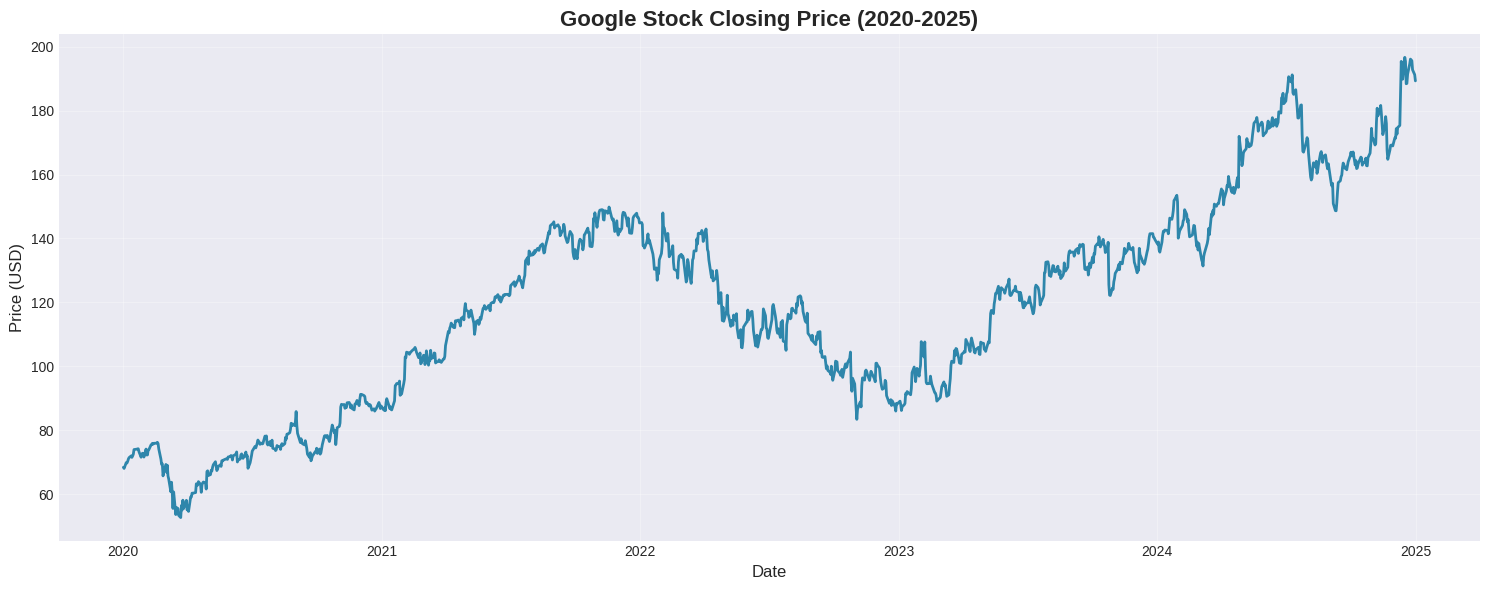

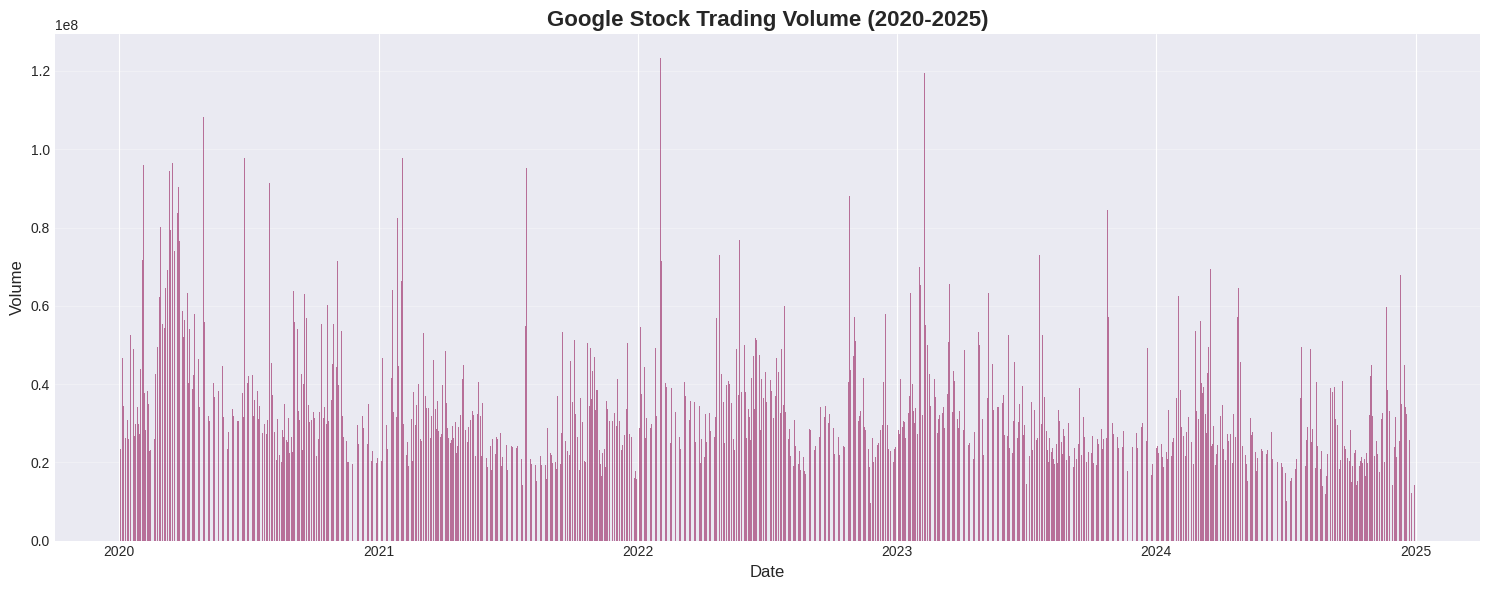

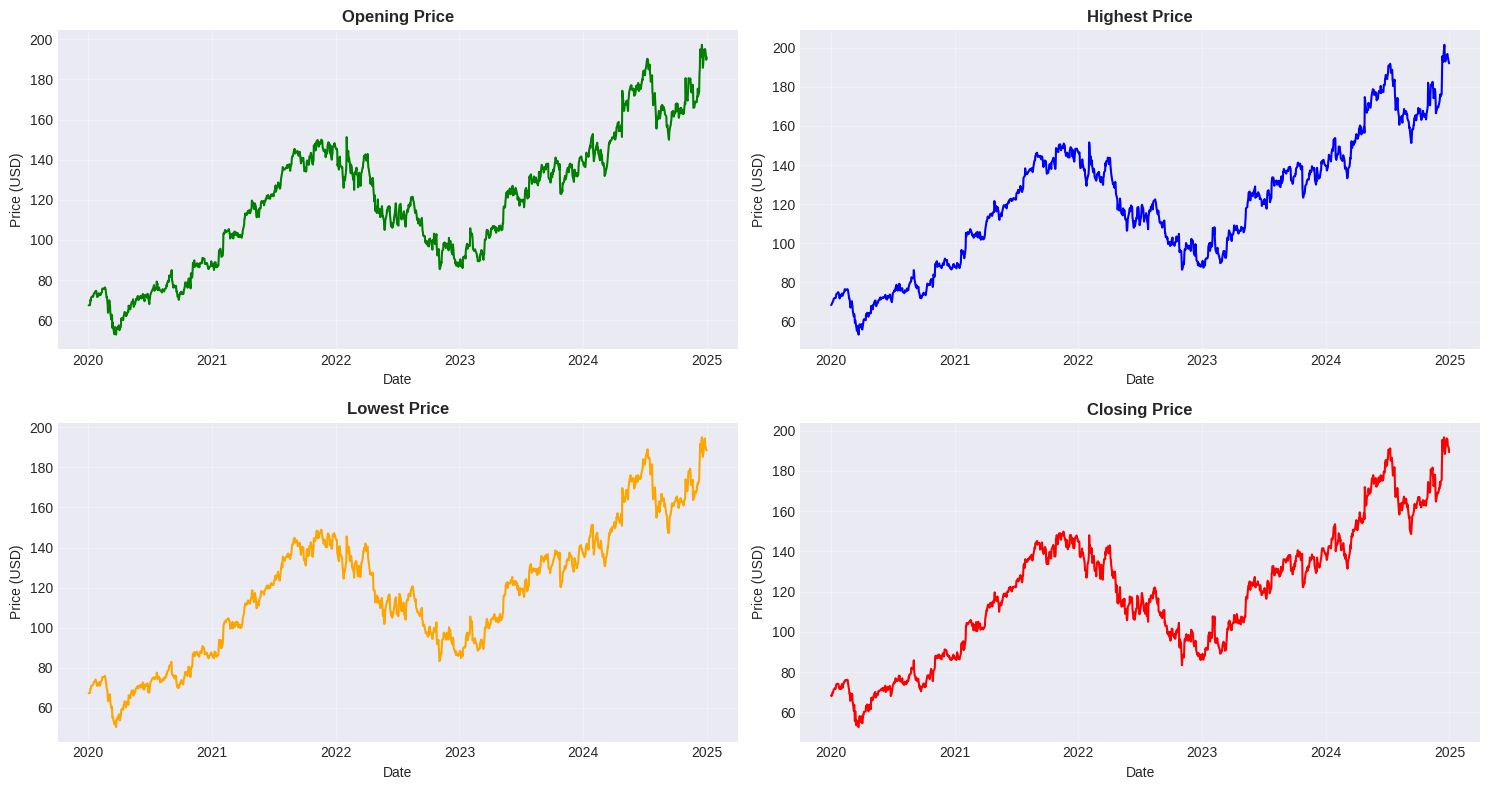

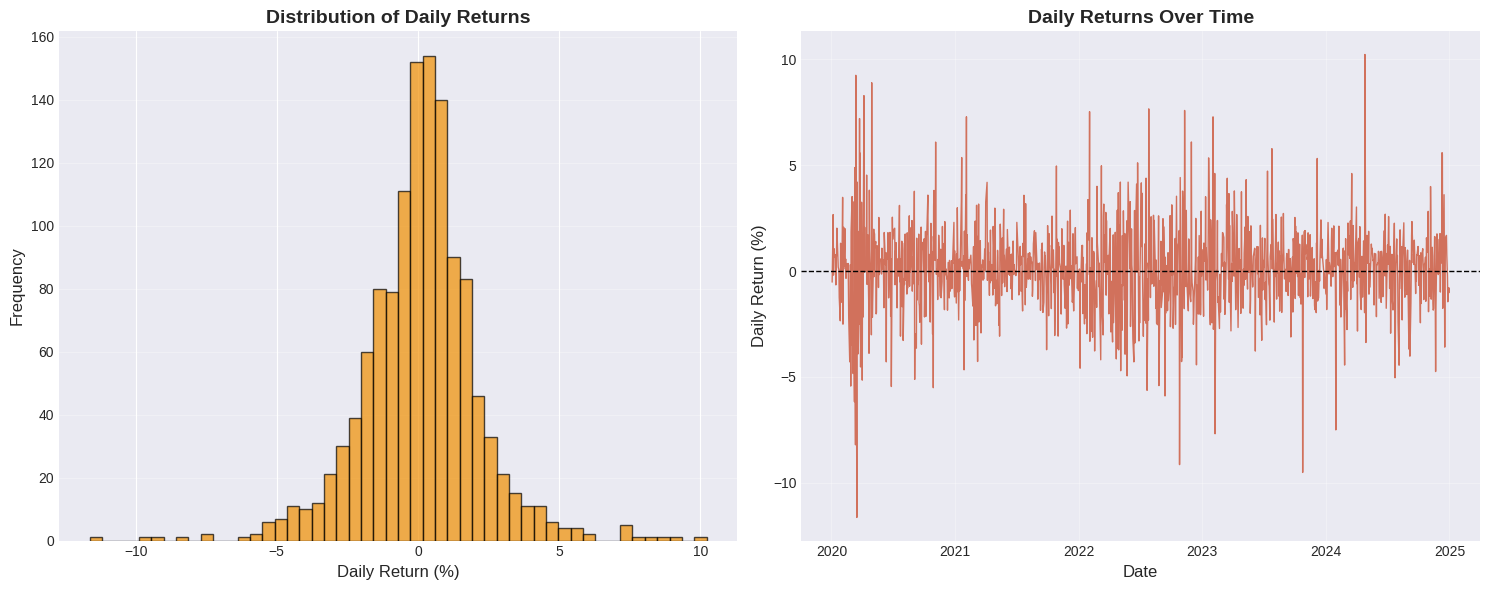

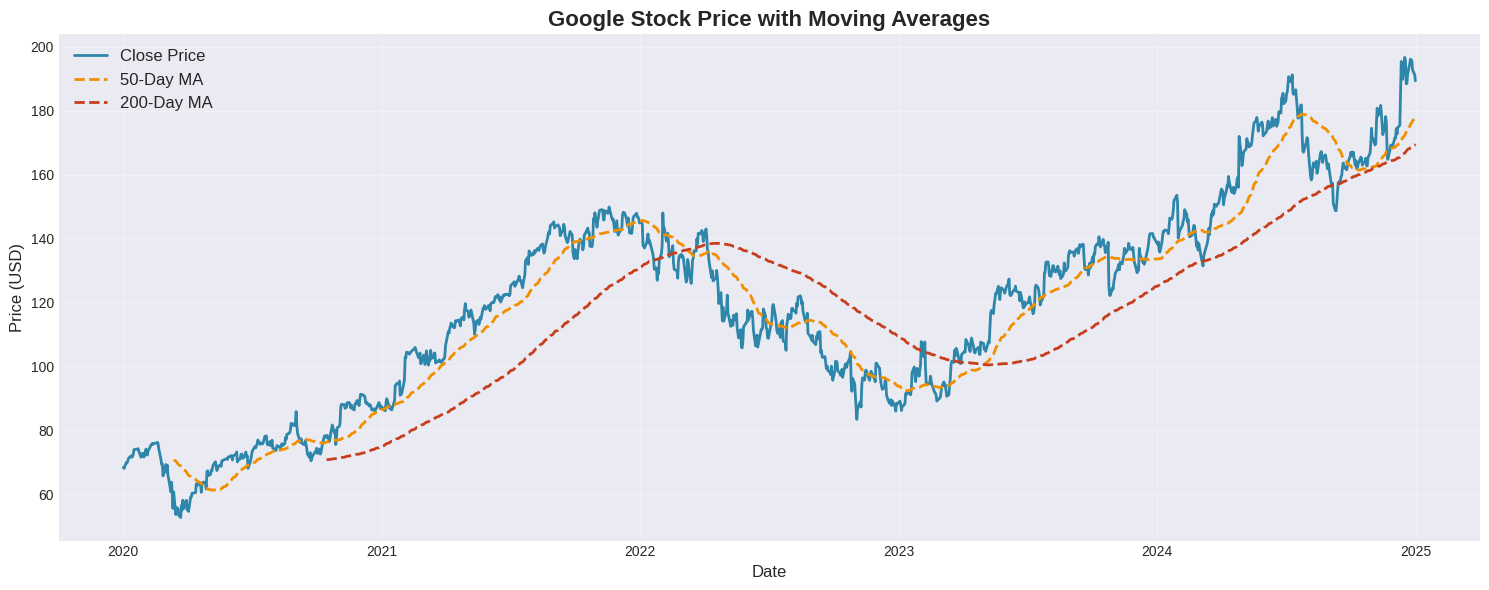

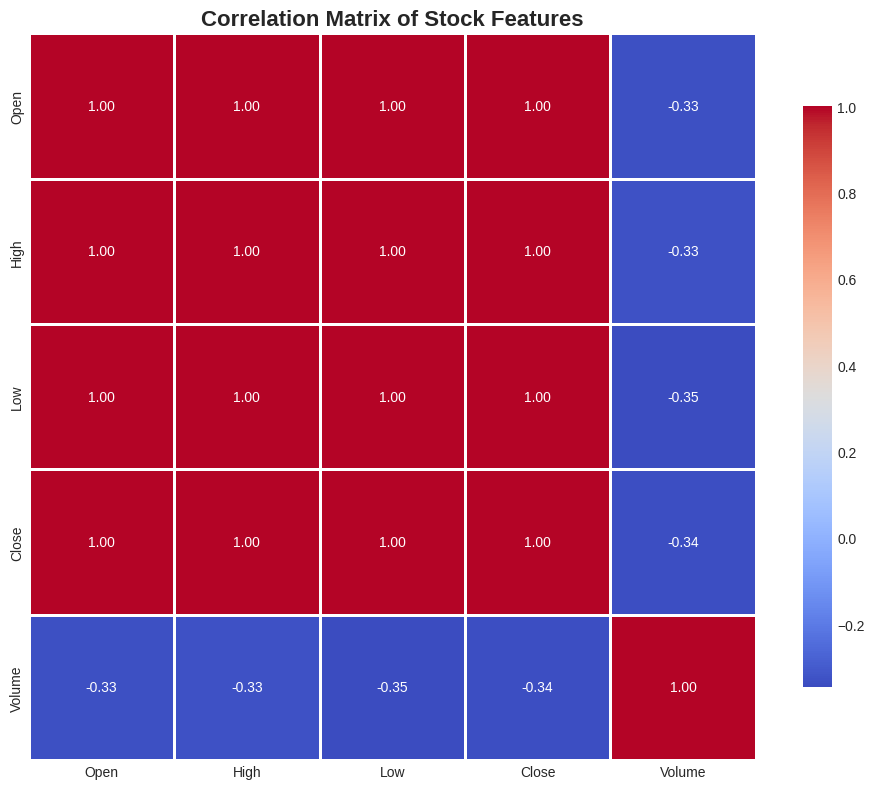

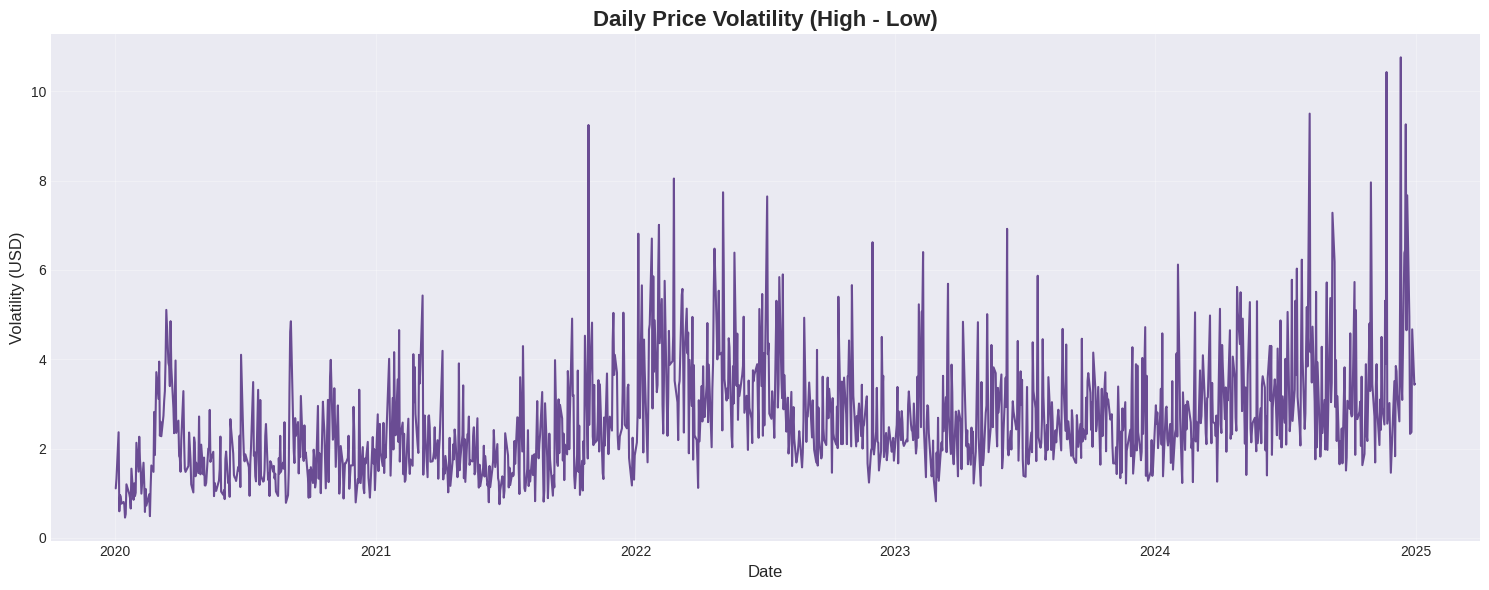

In [ ]:
# ============================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

print("\n" + "=" * 80)
print("STARTING EDA...")
print("=" * 80)

# 3.1 Closing Price Over Time
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], linewidth=2, color='#2E86AB')
plt.title('Google Stock Closing Price (2020-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.2 Volume Traded Over Time
plt.figure(figsize=(15, 6))
plt.bar(df['Date'], df['Volume'], color='#A23B72', alpha=0.7)
plt.title('Google Stock Trading Volume (2020-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 3.3 OHLC Analysis
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Open'], color='green', linewidth=1.5)
plt.title('Opening Price', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(df['Date'], df['High'], color='blue', linewidth=1.5)
plt.title('Highest Price', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(df['Date'], df['Low'], color='orange', linewidth=1.5)
plt.title('Lowest Price', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(df['Date'], df['Close'], color='red', linewidth=1.5)
plt.title('Closing Price', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3.4 Daily Returns Distribution
df['Daily_Return'] = df['Close'].pct_change() * 100
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Daily_Return'].dropna(), bins=50, color='#F18F01', edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
plt.plot(df['Date'], df['Daily_Return'], linewidth=1, color='#C73E1D', alpha=0.7)
plt.title('Daily Returns Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.5 Moving Averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2, color='#2E86AB')
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', linewidth=2, color='#F18F01', linestyle='--')
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', linewidth=2, color='#C73E1D', linestyle='--')
plt.title('Google Stock Price with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.6 Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Stock Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3.7 Volatility Analysis
df['Volatility'] = df['High'] - df['Low']
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Volatility'], linewidth=1.5, color='#6A4C93')
plt.title('Daily Price Volatility (High - Low)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# ============================================
# 4. SAVE CLEANED DATA
# ============================================

# Save cleaned data
df_clean = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
df_clean.to_csv('google_stock_cleaned.csv', index=False)

print("\n" + "=" * 80)
print("DATA CLEANED AND SAVED!")
print("=" * 80)
print(f"Total trading days: {len(df_clean)}")
print(f"Date range: {df_clean['Date'].min()} to {df_clean['Date'].max()}")
print(f"Price range: ${df_clean['Close'].min():.2f} to ${df_clean['Close'].max():.2f}")
print(f"Average daily volume: {df_clean['Volume'].mean():,.0f}")
print("=" * 80)

# Download cleaned file
files.download('google_stock_cleaned.csv')
print("\nCleaned data downloaded! Use this for model training.")


DATA CLEANED AND SAVED!
Total trading days: 1258
Date range: 2020-01-02 00:00:00+00:00 to 2024-12-31 00:00:00+00:00
Price range: $52.71 to $196.66
Average daily volume: 33,087,951


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Cleaned data downloaded! Use this for model training.
